## Feature Engineering

The dataset is obtained from the Seventeenth release of Sloan Digital Sky Surveys (SDSS - DR17). The dataset consists of 100,000 data points with 18 attributes including the class of astronomical objects.

In [1]:
import pandas as pd # For Dataframe manupulation
import numpy as np # For arrays manipulation

#### Data Cleansing

In [2]:
df = pd.read_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification.csv") # Importing astronomical objects dataset
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [3]:
# Handling missing values

null_counts = df.isnull().sum() # To Count the null values in each column

print(null_counts) # to print the null counts for each column

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


There are no null values in the dataset.

In [4]:
# Handling duplicate values

# To Count the duplicate rows in the DataFrame
duplicate_count = df.duplicated().sum()

duplicate_count

0

There are no duplicate rows in the dataset

Outliers were not removed from the dataset , because there could be data with a wide range of spectral features due to the difference of each astronomical object. Otherwise there could be loss of important information, Biasing of the model and Overfitting.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


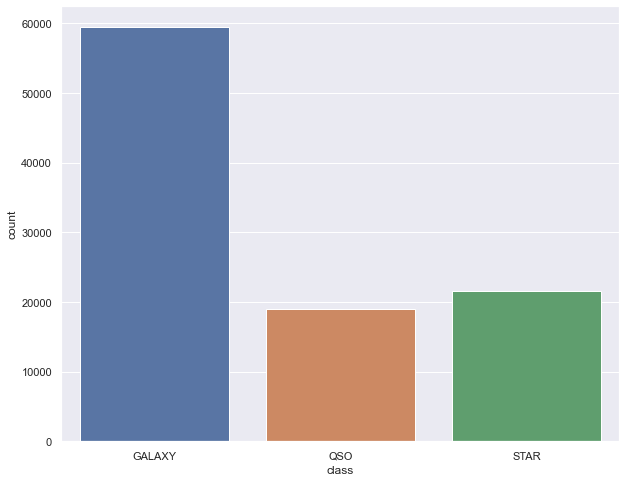

In [5]:
# visualizing distribution of each class

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(df['class'])
plt.show()

In [6]:
# to obtaing number of objects from each class
value_counts = df['class'].value_counts()

print(value_counts)

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


According to the above analysis, it shows that there is an imbalance in the dataset considering the class feature.As a solution the dataset is undersampled with the RandomUnderSampler function.

#### Data Undersampling

In [7]:

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# separating the features and target variable
x = df.drop('class', axis=1)
y = df['class']

# applying RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler()
x_resampled, y_resampled = rus.fit_resample(x, y)

# creating a new DataFrame with the undersampled dataset
dfr = pd.concat([x_resampled, y_resampled], axis=1)

# replacing the original dataset with the undersampled dataset
df = dfr

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


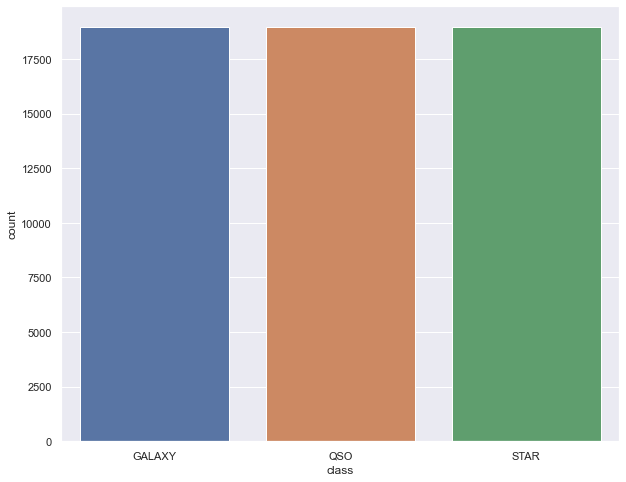

In [8]:
# checking the status of the dataset after undersampling

# visualizing distribution of each class after undersampling

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(dfr['class'])
plt.show()

In [9]:
# obtaing number of objects from each class after undersampling
value_counts = dfr['class'].value_counts()

print(value_counts)

GALAXY    18961
QSO       18961
STAR      18961
Name: class, dtype: int64


#### Feature Selection

In [10]:
# To select a subset of columns
columns_to_keep = ['alpha', 'delta', 'u','g','r','i','z','redshift','class']
dfr = dfr[columns_to_keep]

dfr

,alpha,delta,u,g,r,i,z,redshift,class
0,170.214599,50.170736,22.68562,21.49529,20.23036,19.31338,18.85115,0.554925,GALAXY
1,109.103422,39.490074,19.69344,19.82984,20.24988,20.57636,20.99385,0.000000,GALAXY
2,1.919686,18.104666,22.06377,21.40458,20.79363,21.17457,20.64207,0.348120,GALAXY
3,170.917449,19.948038,20.41234,18.60718,17.48714,17.03697,16.67206,0.154450,GALAXY
4,214.314470,2.913331,19.64748,17.73179,16.74531,16.33220,15.98763,0.131347,GALAXY
...,...,...,...,...,...,...,...,...,...
56878,205.407084,39.436953,21.74166,21.00794,20.85136,20.74223,20.70273,-0.000317,STAR
56879,13.004038,0.883742,23.41342,20.73359,19.32173,18.10044,17.43279,-0.000045,STAR
56880,201.904680,36.165028,19.38153,18.28259,17.86838,17.72071,17.64133,-0.000419,STAR
56881,5.905364,35.025096,17.82602,16.45018,15.74049,15.75101,15.60773,-0.000063,STAR


#### Feature Transformation

In [11]:
from sklearn.preprocessing import LabelEncoder

# To create a LabelEncoder object
le = LabelEncoder()

# To encode categorical variables
dfr['class'] = le.fit_transform(df['class'])
dfr

C:\Users\Asus\AppData\Local\Temp\ipykernel_11044\1752500157.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['class'] = le.fit_transform(df['class'])


,alpha,delta,u,g,r,i,z,redshift,class
0,170.214599,50.170736,22.68562,21.49529,20.23036,19.31338,18.85115,0.554925,0
1,109.103422,39.490074,19.69344,19.82984,20.24988,20.57636,20.99385,0.000000,0
2,1.919686,18.104666,22.06377,21.40458,20.79363,21.17457,20.64207,0.348120,0
3,170.917449,19.948038,20.41234,18.60718,17.48714,17.03697,16.67206,0.154450,0
4,214.314470,2.913331,19.64748,17.73179,16.74531,16.33220,15.98763,0.131347,0
...,...,...,...,...,...,...,...,...,...
56878,205.407084,39.436953,21.74166,21.00794,20.85136,20.74223,20.70273,-0.000317,2
56879,13.004038,0.883742,23.41342,20.73359,19.32173,18.10044,17.43279,-0.000045,2
56880,201.904680,36.165028,19.38153,18.28259,17.86838,17.72071,17.64133,-0.000419,2
56881,5.905364,35.025096,17.82602,16.45018,15.74049,15.75101,15.60773,-0.000063,2


In [12]:
print(le.classes_)

['GALAXY' 'QSO' 'STAR']


### Feature Scaling

##### Normalization using min-max method

In [13]:
# Copying df dataset for min_max normalization
dfn = dfr.copy()

In [14]:
# Selecting the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the minimum and maximum values of each column
min_vals = dfn[cols_to_normalize].min()
max_vals = dfn[cols_to_normalize].max()

# Normalizing each column using the min-max method
dfn[cols_to_normalize] = (dfn[cols_to_normalize] - min_vals) / (max_vals - min_vals)

In [15]:
dfn

,alpha,delta,u,g,r,i,z,redshift,class
0,0.472803,0.677462,0.998994,0.999092,0.527008,0.434177,0.999009,0.080456,0
1,0.303044,0.572530,0.998695,0.998925,0.527996,0.489885,0.999222,0.001420,0
2,0.005302,0.362428,0.998932,0.999082,0.555528,0.516271,0.999187,0.051001,0
3,0.474755,0.380538,0.998767,0.998804,0.388109,0.333769,0.998792,0.023418,0
4,0.595306,0.213180,0.998691,0.998716,0.350548,0.302683,0.998723,0.020127,0
...,...,...,...,...,...,...,...,...,...
56878,0.570563,0.572008,0.998900,0.999043,0.558451,0.497201,0.999193,0.001375,2
56879,0.036093,0.193240,0.999066,0.999016,0.481001,0.380677,0.998867,0.001414,2
56880,0.560834,0.539862,0.998664,0.998771,0.407412,0.363928,0.998888,0.001360,2
56881,0.016374,0.528663,0.998509,0.998588,0.299670,0.277048,0.998685,0.001411,2


In [16]:
# Save the min-max normalized dataset with redshift to a new CSV file
dfn.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_r.csv",index = False)

In [17]:
dfn_wr =dfn.drop(['redshift'],axis='columns') # to create a dataset without redshift

In [18]:
# Save the min-max normalized dataset without redshift to a new CSV file
dfn_wr.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_mm_wr.csv",index = False)

##### Normalization using Z-Score method

In [19]:
# Copying df dataset for Z-Score normalization
dfz = dfr.copy()

In [20]:
# Select the columns to be normalized
cols_to_normalize = ['alpha', 'delta', 'u','g','r','i','z','redshift']

# Calculating the mean and standard deviation of each column
mean_vals = dfz[cols_to_normalize].mean()
std_vals = dfz[cols_to_normalize].std()

# Normalizing each column using the z-score method
dfz[cols_to_normalize] = (dfz[cols_to_normalize] - mean_vals) / std_vals


In [21]:
dfz

,alpha,delta,u,g,r,i,z,redshift,class
0,-0.074487,1.289303,0.026105,0.028179,0.278991,0.019125,0.000182,-0.173181,0
1,-0.698904,0.750608,-0.045018,-0.011422,0.289704,0.731347,0.051148,-0.779582,0
2,-1.794078,-0.327996,0.011324,0.026022,0.588107,1.068690,0.042780,-0.399170,0
3,-0.067306,-0.235023,-0.027930,-0.040495,-1.226457,-1.264591,-0.051649,-0.610805,0
4,0.376113,-1.094194,-0.046110,-0.061310,-1.633565,-1.662025,-0.067928,-0.636052,0
...,...,...,...,...,...,...,...,...,...
56878,0.285100,0.747929,0.003668,0.016591,0.619789,0.824884,0.044223,-0.779929,2
56879,-1.680821,-1.196559,0.043405,0.010067,-0.219655,-0.664877,-0.033554,-0.779631,2
56880,0.249313,0.582905,-0.052432,-0.048213,-1.017237,-0.879015,-0.028594,-0.780040,2
56881,-1.753353,0.525410,-0.089405,-0.091785,-2.184998,-1.989771,-0.076964,-0.779651,2


In [22]:
# Saving the z-score normalized dataset with redshift to a new CSV file
dfz.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc_r.csv",index = False)

In [ ]:
dfz_wr =dfz.drop(['redshift'],axis='columns')  # to create a dataset without redshift

In [ ]:
# Saving the z-score normalized dataset without redshift to a new CSV file
dfz_wr.to_csv("D:/Academic/MSc_Data_Science/Course/8.Technology Dissertation/4. Dissertation/Datasets/sgq_classification_zc_wr.csv",index = False)